### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importing Data and EDA

In [2]:
df = pd.read_csv("Reviews.csv")
df

,Review_title,Review_text,Ratings
0,Nothing more than a traditional watch,The product is just like traditional watch. It...,2
1,DONT BUY GO WITH OTHER BRAND,ACCURACY OF THIS WATCH IS TOTALLY WRONG.<br>BE...,2
2,Not as expected,"Sometimes touch doesn't work properly, looks l...",2
3,Disappointed with accuracy and interface.,Quite good product look and touch response is ...,2
4,Its good but not as expected,1. The steps are not counted everytime<br>2. T...,2
...,...,...,...
46298,Fabulous!,Good monitor + ame + point,5
46299,Great product,This is awesome,5
46300,Simply awesome,Goof,5
46301,Worth every penny,Vary nice,5


In [3]:
# printing the shape of the data and null values
print (f"The shape of the the data is: {df.shape}\nThe number of null values present in the data is\n{df.isnull().sum()}")

The shape of the the data is: (46303, 3)
The number of null values present in the data is
Review_title    0
Review_text     0
Ratings         0
dtype: int64


In [4]:
# looking at the information of the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46303 entries, 0 to 46302
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  46303 non-null  object
 1   Review_text   46303 non-null  object
 2   Ratings       46303 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
# printing number of unique values in each columns
for i in df:
    print (f"The number of unique values in {str(i).upper()} column is: {df[i].nunique()}")

The number of unique values in REVIEW_TITLE column is: 16812
The number of unique values in REVIEW_TEXT column is: 26242
The number of unique values in RATINGS column is: 5


- Since the data was already cleaned before saving it. Cleaning it is not necessary and hence we will move to the preprocessing stage

### Preprocessing

In [6]:
import re
import nltk
import string
from nltk.corpus import stopwords

In [7]:
# combining review_title and review_text 
df["Review"] = df['Review_title'].map(str)+' '+df['Review_text']
df.Review.nunique()

28481

In [8]:
# before preprocessing
df.Review[1]

'DONT BUY GO WITH OTHER BRAND ACCURACY OF THIS WATCH IS TOTALLY WRONG.<br>BELT STRAP IS VERY LOW QUALITY PLASTIC.<br>BATTERY BACKUP IS ALSO NOT GOOD WITH CALING BACKUP ONLY 1 DAY WITHOUT CALLING ONLY 4-5 DAY ONLY.'

In [9]:
def clean_text(df, df_column_name):
  # Convert all messages to lower case
  df[df_column_name] = df[df_column_name].str.lower()

  # Replace email addresses with 'email'
  df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')

  # Replace URLs with 'webaddress'
  df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')
                                    
  # Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
  df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'currency')
      
  # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
  df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

  # Replace numbers with 'number'
  df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'number')

  # Remove punctuation
  df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

  # Replace whitespace between terms with a single space
  df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

  # Remove leading and trailing whitespace
  df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')

  # Remove stopwords
  stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', 'im', 'dont', 'doin', 'ure'])
  df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [10]:
clean_text(df,"Review")

In [11]:
# after cleaning
df.Review[1]

'buy go brand accuracy watch totally wrong br belt strap low quality plastic br battery backup also good caling backup number day without calling number number day'

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()

# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'): 
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [13]:
# after lemmatizing
df.Review[1]

'buy go brand accuracy watch totally wrong br belt strap low quality plastic br battery backup also good caling backup number day without call number number day'

In [14]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [15]:
# Creating column for word counts in the review text
df['Review_Count'] = df['Review'].apply(lambda x: len(str(x).split(' ')))

# Creating column for character counts in the review text
df['Review_Char'] = df['Review'].str.len()

In [16]:
# dataframe post processcing
df.head()

,Review_title,Review_text,Ratings,Review,Review_Count,Review_Char
0,Nothing more than a traditional watch,The product is just like traditional watch. It...,2,nothing traditional watch product like traditi...,54,371
1,DONT BUY GO WITH OTHER BRAND,ACCURACY OF THIS WATCH IS TOTALLY WRONG.<br>BE...,2,buy go brand accuracy watch totally wrong br b...,27,159
2,Not as expected,"Sometimes touch doesn't work properly, looks l...",2,expect sometimes touch work properly look like...,27,159
3,Disappointed with accuracy and interface.,Quite good product look and touch response is ...,2,disappointed accuracy interface quite good pro...,22,164
4,Its good but not as expected,1. The steps are not counted everytime<br>2. T...,2,good expect number step count everytime br num...,36,218


In [17]:
# copying the dataframe to another variable 
rating = df.copy()

### Removing Outliers

In [21]:
# Applying zscore to remove outliers

from scipy.stats import zscore

z_score = zscore(rating[['Review_Count']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
rating = rating[filtering_entry]
print(f"We have {rating.shape[0]} Rows in our dataframe after removing outliers")

We have 44706 Rows in our dataframe after removing outliers


### Visualizations

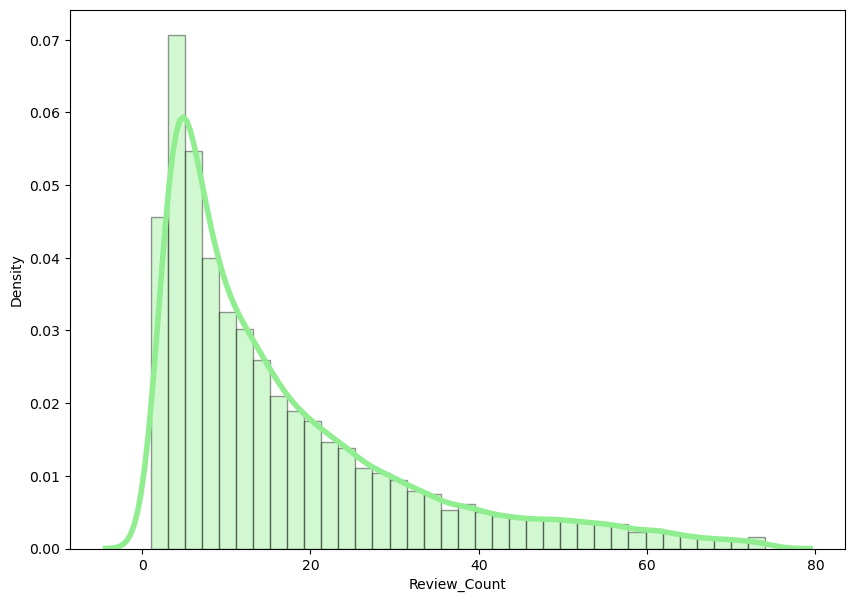

In [23]:
# plotting the counts 
# Density plot and histogram of word count
plt.figure(figsize=(10,7))
sns.distplot(rating['Review_Count'], hist = True, kde = True,
            bins = int(180/5), color = 'lightgreen',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

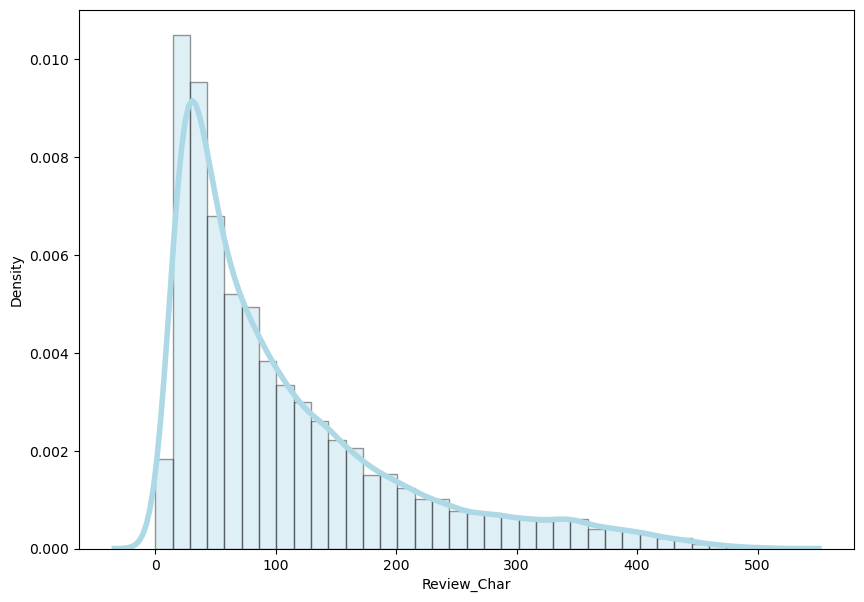

In [27]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(rating['Review_Char'], hist = True, kde = True,
            bins = int(180/5), color = 'lightblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

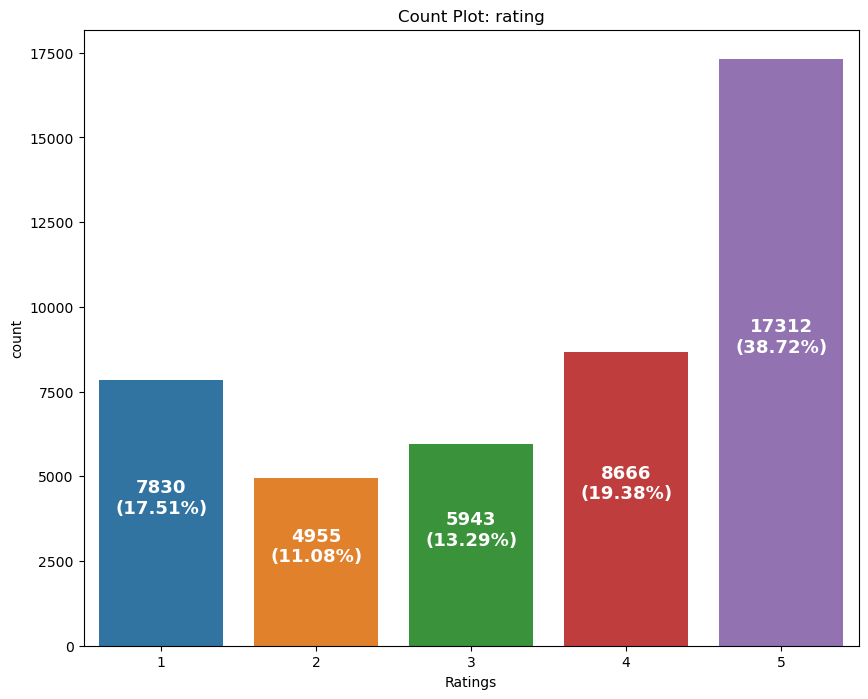

In [28]:
# Checking the ratings details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=rating,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(rating),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

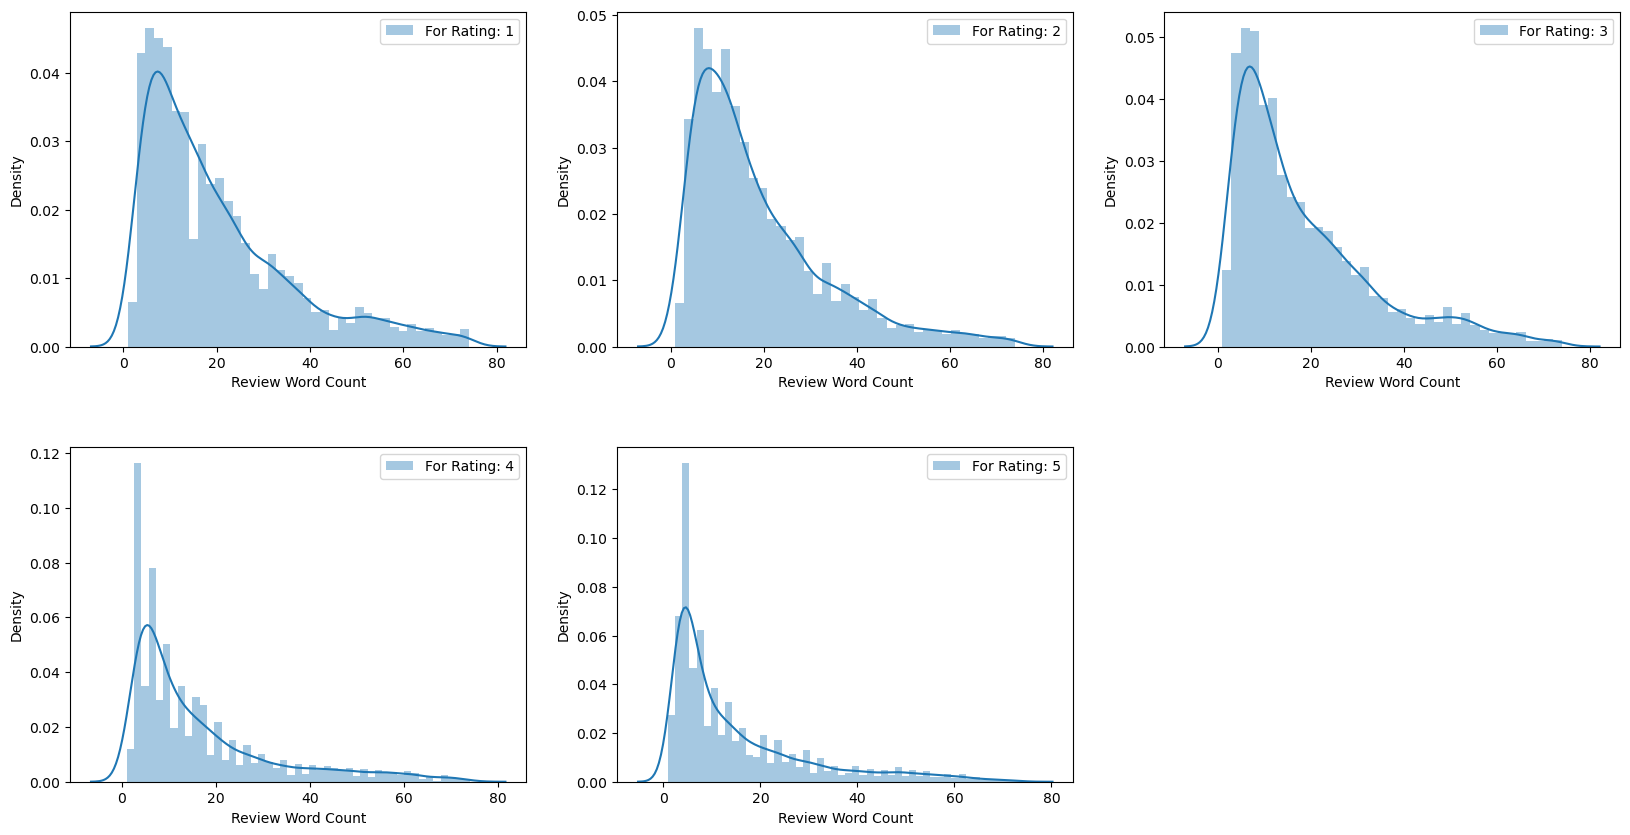

In [29]:
# Checking review word count distribution for each rating
ratings = np.sort(rating.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(rating.Review_Count[rating.Ratings==i], ax=axis, label=f"For Rating: {i}")
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

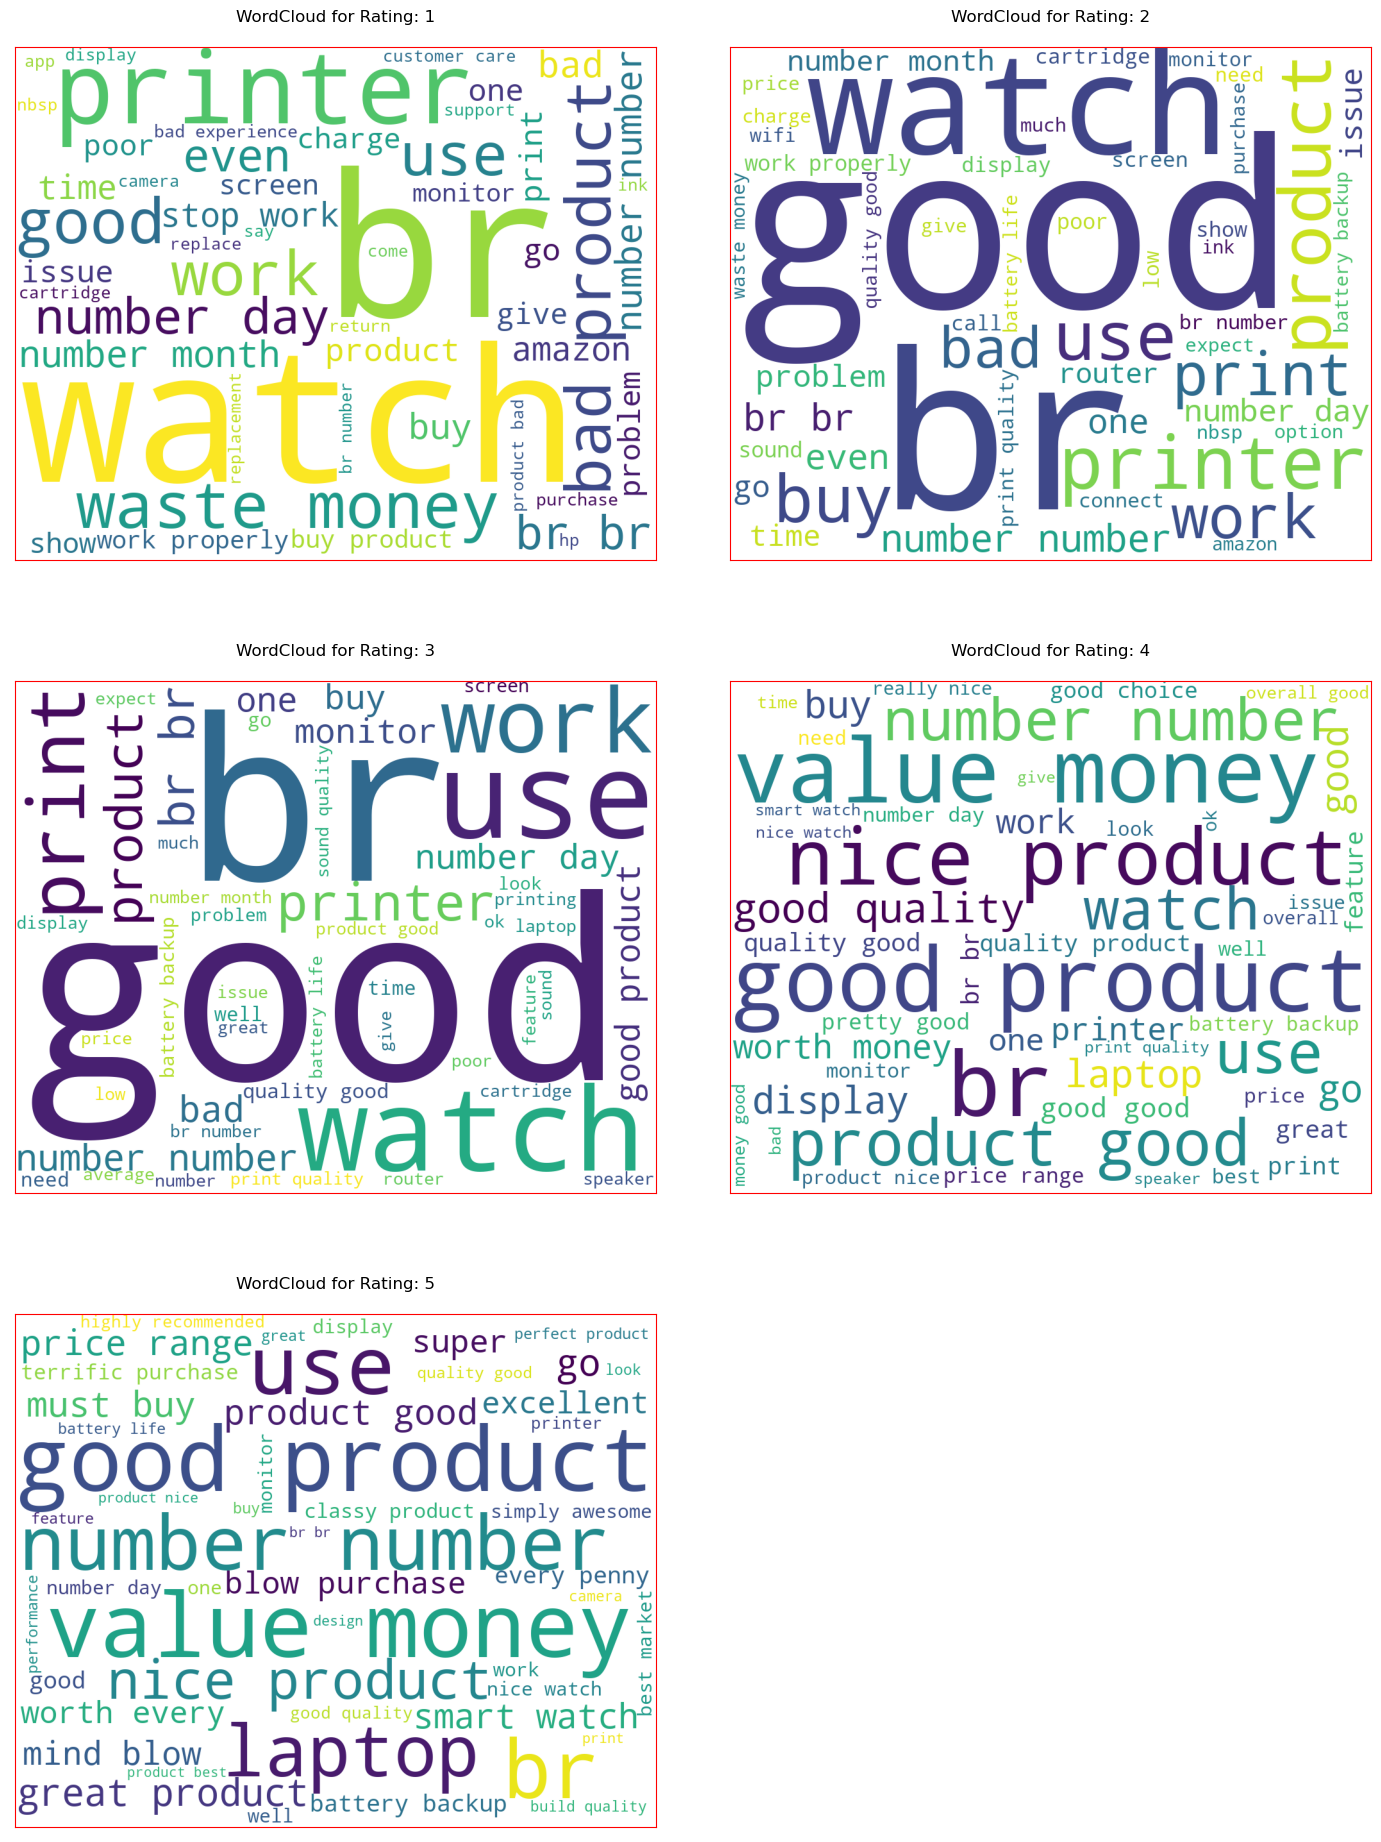

In [30]:
from wordcloud import WordCloud
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(rating.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(rating.Review[rating.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

In [32]:
# shuffling the entire data set
rating = rating.sample(frac=1).reset_index(drop=True)

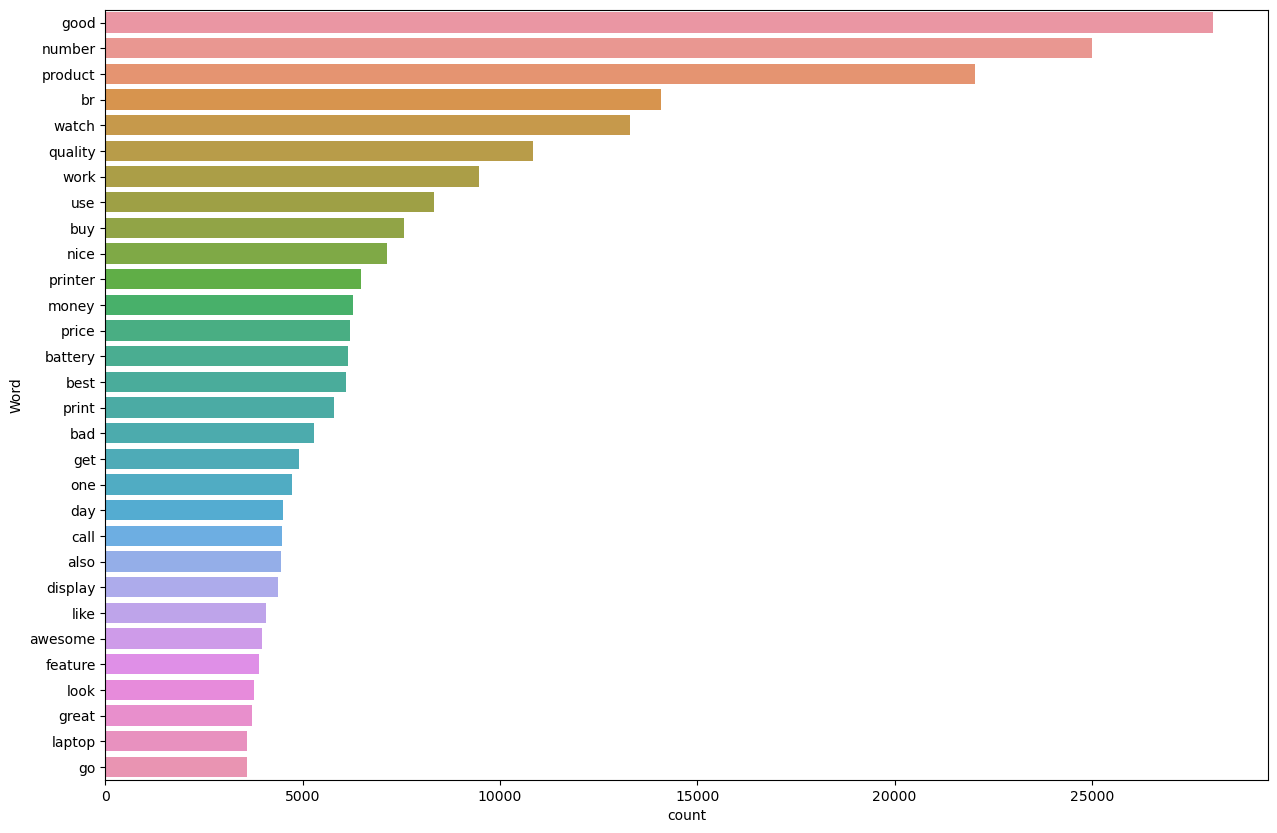

In [34]:
# Function to plot most frequent terms in our Review column
from nltk import FreqDist
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(rating['Review']) 

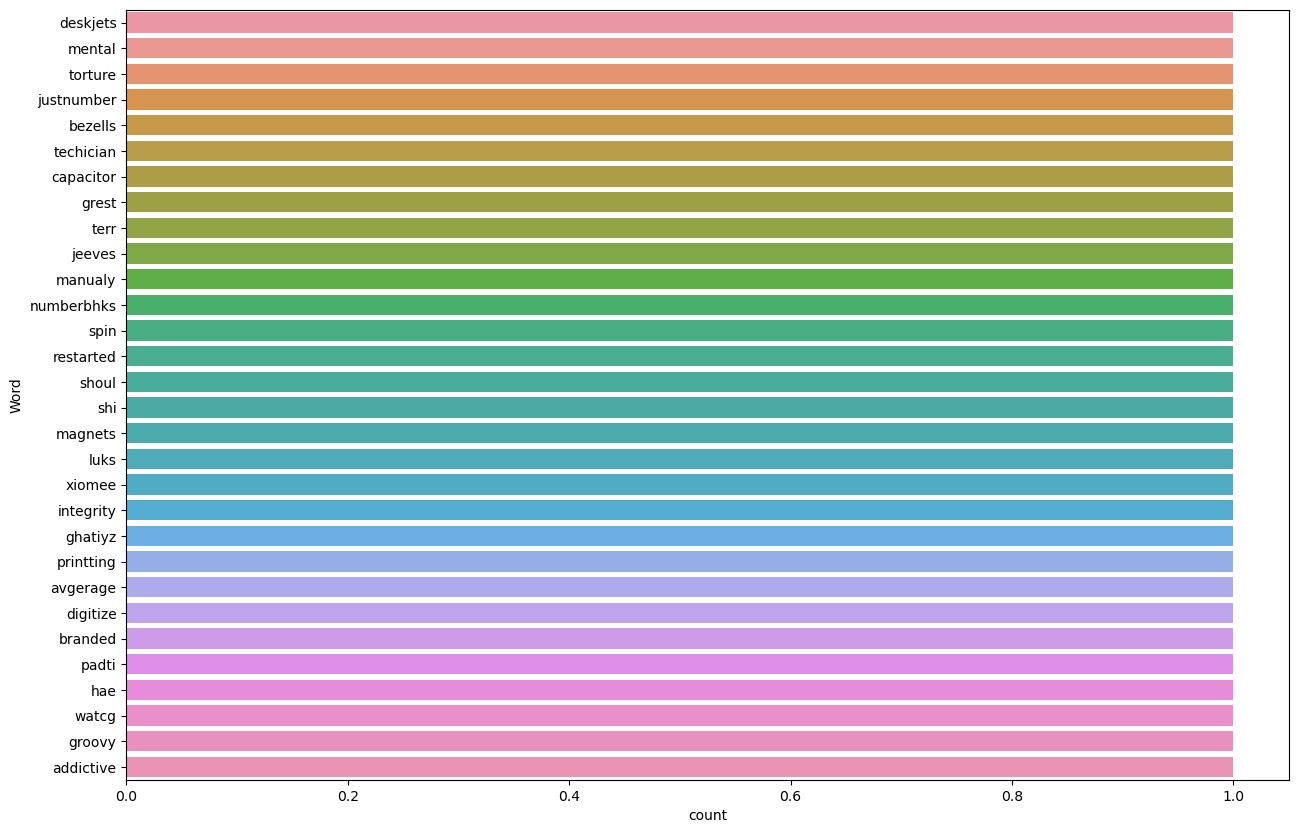

In [35]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(rating['Review'])   

### Model Building

In [36]:
# Separating features and labels here
x = rating['Review']
y = rating['Ratings']

In [39]:
# Using the n_gram tfidf vectorizer (Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

In [41]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = 42)

In [49]:
import lightgbm 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Defining the Classification Machine Learning Algorithms
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

In [50]:
for model in [lr,svc,bnb,mnb,sgd,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 76.66269012824336
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.75      0.86      0.80      2335
           2       0.70      0.54      0.61      1497
           3       0.63      0.59      0.61      1737
           4       0.71      0.68      0.70      2634
           5       0.85      0.89      0.87      5209

    accuracy                           0.77     13412
   macro avg       0.73      0.71      0.72     13412
weighted avg       0.76      0.77      0.76     13412

CONFUSION MATRIX: 
 [[2007  126  115   38   49]
 [ 318  801  230   78   70]
 [ 217  138 1018  213  151]
 [  75   52  171 1801  535]
 [  70   24   71  389 4655]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

In [53]:
from sklearn.model_selection import GridSearchCV,cross_val_score
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,bnb,mnb,sgd,lgb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score: 76.38572003757885


******************************LinearSVC******************************
Cross validation score: 77.49519080212947


******************************BernoulliNB******************************
Cross validation score: 62.25786247930927


******************************MultinomialNB******************************
Cross validation score: 64.92640808839977


******************************SGDClassifier******************************
Cross validation score: 75.62295888695031


******************************LGBMClassifier******************************
Cross validation score: 75.64980092157653




- Linear SVC is the best model, so we will perform Hyperparameter Tuning to enhance model performance

In [54]:
# Lets select the different parameters for tuning our best model (Linear SVC)
grid_params =  {'C':(0.001, 0.01, 0.1, 1, 10),
                   'penalty':('l1','l2'),
                  'loss':('hinge','squared_hinge')}

# Train the model with given parameters using GridSearchCV
LSVC =  GridSearchCV(svc, grid_params, cv=3)
LSVC.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10),
                         'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')})

In [55]:
LSVC.best_params_

{'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [56]:
# Final Model with the best chosen parameters list
best_model = LinearSVC(C= 1, loss= 'squared_hinge', penalty= 'l2')
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 78.03459588428274

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.78      0.84      0.81      2335
           2       0.70      0.58      0.64      1497
           3       0.66      0.64      0.65      1737
           4       0.72      0.70      0.71      2634
           5       0.86      0.90      0.88      5209

    accuracy                           0.78     13412
   macro avg       0.75      0.73      0.74     13412
weighted avg       0.78      0.78      0.78     13412


CONFUSION MATRIX: 
 [[1954  150  132   44   55]
 [ 263  874  199   89   72]
 [ 171  129 1112  206  119]
 [  64   61  158 1855  496]
 [  54   29   77  378 4671]]


### Saving the model

In [57]:
import joblib
joblib.dump(best_model, "Rating_Prediction_Model.pkl")

['Rating_Prediction_Model.pkl']

In [58]:
# Saving the final dataframe 
df.to_csv("Rating_Prection_Dataframe",index=False)